In [8]:
import skysurvey
from skysurvey import effects

#snia = skysurvey.SNeIa()
snia = skysurvey.SNeIa.from_draw(1000, effect=effects.mw_extinction)
data = snia.draw(size=50_000, tstart=56_000, tstop=56_100, inplace=True) # see options


data.head(5) # also snia.data

,z,x1,c,t0,ra,dec,magabs,mwebv,magobs,x0,template
0,0.06755,-1.085,-0.063,56001.742188,136.616470,-5.363555,-19.393297,0.026808,18.094278,0.000918,salt2
1,0.12405,0.440,-0.022,56060.132812,134.179718,-8.050444,-19.660194,0.041655,19.229015,0.000323,salt2
2,0.14135,1.035,0.183,56029.339844,26.906420,-25.699486,-18.720894,0.018122,20.475567,0.000102,salt2
3,0.14955,0.605,0.057,56092.257812,66.878815,-56.013935,-19.308088,0.022539,20.021885,0.000156,salt2
4,0.11595,-0.440,0.276,56018.312500,117.453110,6.346167,-18.320980,0.033485,20.410278,0.000109,salt2


In [9]:
import numpy as np
from skysurvey.tools import utils

size = 10_000

# footprint
from shapely import geometry
sq_footprint = geometry.box(-1, -1, +1, +1)

# Observing data
ra, dec = utils.random_radec(size=size, ra_range=[200,250], dec_range=[-20,10])

data = {}
data["ra"] = ra
data["dec"] = dec
data["gain"] = 1
data["zp"] = 30
data["skynoise"] = np.random.normal(size=size, loc=150, scale=20)
data["mjd"] = np.random.uniform(56_000-10, 56_100 + 10, size=size)
data["band"] = np.random.choice(["desg","desr","desi"], size=size)

# Build the survey
survey = skysurvey.Survey.from_pointings(data, footprint=sq_footprint)
survey.data

,ra,dec,gain,zp,skynoise,mjd,band,fieldid_survey,fieldid
87676,212.338104,3.476743,1,30,125.977028,55990.003906,desi,4240,221926
87708,212.338104,3.476743,1,30,125.977028,55990.003906,desi,4240,221927
87743,212.338104,3.476743,1,30,125.977028,55990.003906,desi,4240,221928
87776,212.338104,3.476743,1,30,125.977028,55990.003906,desi,4240,221929
87808,212.338104,3.476743,1,30,125.977028,55990.003906,desi,4240,221930
...,...,...,...,...,...,...,...,...,...
81336,219.256622,5.515939,1,30,112.466919,56109.976562,desg,830,220314
84282,219.256622,5.515939,1,30,112.466919,56109.976562,desg,830,221111
84306,219.256622,5.515939,1,30,112.466919,56109.976562,desg,830,221112
84328,219.256622,5.515939,1,30,112.466919,56109.976562,desg,830,221113


In [12]:
from skysurvey import dataset
dset = dataset.DataSet.from_targets_and_survey(snia, survey)
dset.data

/Users/andradenebula/Documents/Research/Transient_Metrics/Rubin_Data_Preview_SNe/skysurvey-env/lib/python3.12/site-packages/skysurvey/dataset.py:726: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  this_survey = gsurvey_indexed.get_group(index_).copy()


fieldid  band           mjd  zp zpsys  gain    skynoise  \
index index_obs                                                            
42860 0               42  desg  56081.695312  30    ab     1  109.186974   
34675 1               52  desg  56081.695312  30    ab     1  109.186974   
15585 11              69  desi  56022.910156  30    ab     1  177.134659   
      10              69  desg  56049.039062  30    ab     1  116.898499   
      12              69  desi  56084.929688  30    ab     1  158.270981   
...                  ...   ...           ...  ..   ...   ...         ...   
17074 465972       19142  desg  55999.675781  30    ab     1  155.105316   
28862 465984       19144  desr  56043.035156  30    ab     1  149.663834   
      465983       19144  desg  56102.710938  30    ab     1  171.400528   
25293 465995       19145  desg  56085.472656  30    ab     1   187.79921   
      465994       19145  desg  56100.425781  30    ab     1  111.939133   

                        flux     fluxerr  
index index_obs                           
42860 0            50.569863  109.186972  
34675 1          1718.192247  116.815941  
15585 11         3539.627785  186.549997  
      10          553.440286  119.123121  
      12          619.167109  159.822782  
...                      ...         ...  
17074 465972     -140.079080  155.105313  
28862 465984     4242.304286  163.051617  
      465983       31.678605  171.400527  
25293 465995      682.991329  188.988859  
      465994      341.928519  113.244710  

[49555 rows x 9 columns]

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u

In [36]:
#https://lsstcomcam.lsst.io/

# Igor reccomended total field span of 0.45 degrees 

CCD = 4000 #pixels
plate_Scale = 0.2 #arcsec/pixel

angular_Size = CCD * plate_Scale
angular_Size_deg = angular_Size / 3600
raft = angular_Size_deg * 3 # 3x3 CCDs

print(f"{angular_Size} arcseconds")
print(f"Each CCD spans ~{angular_Size_deg} degrees")
print(f"A ComCam raft is 3 CCDs wide, spanning {raft} deg total.")
# Each CCD spans 



800.0 arcseconds
Each CCD spans ~0.2222222222222222 degrees
A ComCam raft is 3 CCDs wide, spanning 0.6666666666666666 deg total.


In [20]:
#Configuration

# Define the four DP1 fields with central RA/Dec
fields = {
    "ECDFS":  (53.1,  -27.8),
    "EDFS":   (59.8,  -48.7),
    "LELF":   (38.6,    7.2),
    "Fornax": (106.4, -10.8)
}

# Parameters for the 3x3 CCD grid
n_tiles = 3
tile_sep_deg = 0.15  # typical spacing ~0.15 deg between CCD centers


In [22]:


# Build pointing table
pointings = []
for field_name, (ra_center, dec_center) in fields.items():
    for dx in range(-1, 2):  # -1, 0, 1
        for dy in range(-1, 2):
            ra = ra_center + dx * tile_sep_deg
            dec = dec_center + dy * tile_sep_deg
            pointings.append({
                "field": field_name,
                "ra": ra,
                "dec": dec,
                "mjd": 59850.0,
                "band": "r",
                "depth": 24.0
            })

df_pointings = pd.DataFrame(pointings)

# Convert to SkyCoord for plotting
coords = SkyCoord(ra=df_pointings['ra'].values * u.deg,
                  dec=df_pointings['dec'].values * u.deg, frame='icrs')





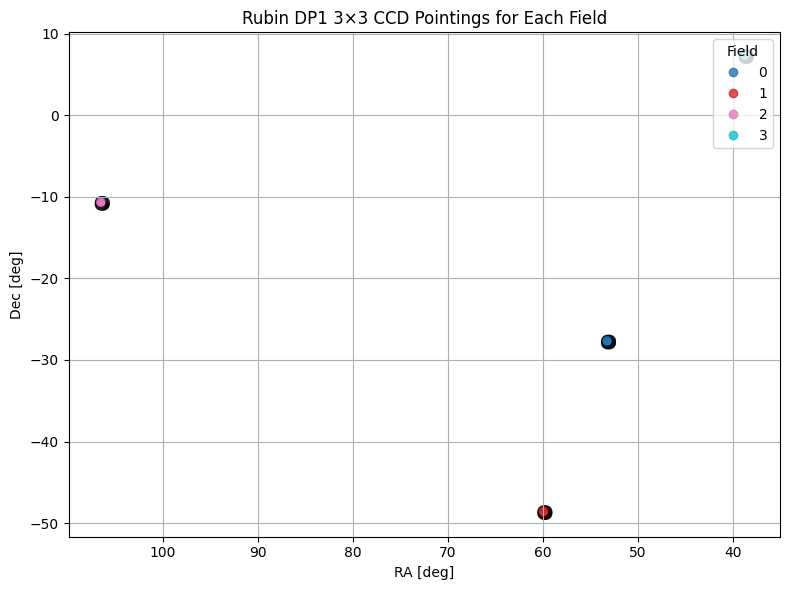

In [24]:
# Plot the footprint
plt.figure(figsize=(8, 6))
scatter = plt.scatter(coords.ra.deg, coords.dec.deg, c=df_pointings['field'].astype('category').cat.codes,
                      cmap='tab10', s=60, edgecolor='k', alpha=0.8)
plt.xlabel("RA [deg]")
plt.ylabel("Dec [deg]")
plt.title("Rubin DP1 3×3 CCD Pointings for Each Field")
plt.gca().invert_xaxis()
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Field", loc="upper right")
plt.tight_layout()